## Observations and Insights 

The Drug Regimen Infubinol appears to have an outlier; the other regimens do not. 

There is a positve correlation between mouse weight and tumor volume for the Capomulin Regimen. 

The tumor volume of mouse f966 began to decline after the first timepoint.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
df.shape

(1893, 8)

In [3]:
# Number of unique mice
df["Mouse ID"].nunique()


249

In [4]:
# Find the mice with duplidate timepoints 
duplicate = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Show data about the mouse with duplicate data
dup_mouse = df.loc[df["Mouse ID"] == "g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'last').reset_index(drop = True)

In [7]:
# Check the number of mice in the clean DataFrame.
df.reset_index()
print(df.shape)
df["Mouse ID"].nunique()


(1888, 8)


249

## Summary Statistics

In [8]:
#Calculate mean, meanian, variance, standard deviation and SEM of the tumor volume for each drug regimen

volume_mean = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
volume_median = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
volume_variance = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
volume_stddev = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
volume_sem = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


#Create a Summary DataFrame containting the above information
summary_df = pd.DataFrame({'Mean': volume_mean, 
                           'Median': volume_median, 
                           'Variance': volume_variance,
                           'Standard Deviation': volume_stddev, 
                           'SEM': volume_sem
                          })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

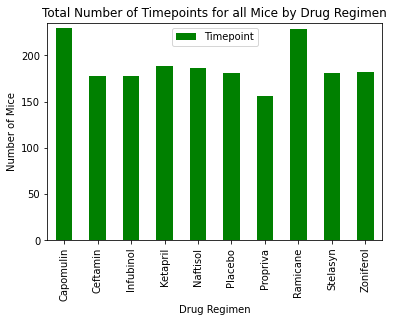

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', color="green", 
                                                     title="Total Number of Timepoints for all Mice by Drug Regimen",
                                                     ylabel = ("Number of Mice"),
                                                     legend = True,
                                                     ylim = (0, 235)
                                                         );


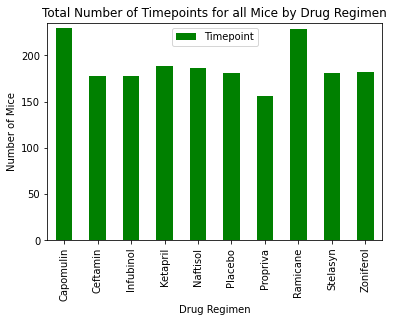

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_sum = df.groupby('Drug Regimen')['Timepoint'].count()
timepoints_sum.plot(kind="bar", color="green")
plt.title("Total Number of Timepoints for all Mice by Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend()
plt.ylim(0, 235)
plt.show()


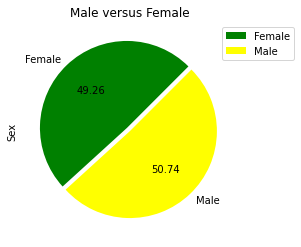

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = df.groupby('Sex').count()
colors = ["green", "yellow"]
explode = [.05, 0]
ax = sex_count.plot(kind="pie", y='Mouse ID', autopct='%.2f', colors=colors, ylabel = "Sex", title = "Male versus Female", startangle=45, explode=explode);
ax.legend(bbox_to_anchor=(.9, 1.0));

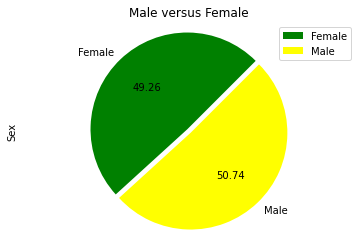

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = df.groupby('Sex').count()
sex_count = sex.iloc[:,1]
explode = [.05, 0]
colors = ["green", "yellow"]
plt.pie(sex_count, colors=colors, autopct='%.2f', labels=sex_count.keys(), startangle=45, explode=explode)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Male versus Female")
plt.legend();

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Create a dataframe with the ma Timepoint for the 4 Regimens. 

four_treatments = df.loc[(df["Drug Regimen"] == "Capomulin") | 
                         (df["Drug Regimen"] == "Ramicane") | 
                         (df["Drug Regimen"] == "Infubinol") | 
                         (df["Drug Regimen"] == "Ceftamin"),:].groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_df = four_treatments.merge(df, how = "left", on = ["Mouse ID", "Timepoint"])


Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list. Determine outliers using the upper and lower bounds, then print the results.

In [33]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

capomulin_tum_vol = []
ramicane_tum_vol = []
infubinol_tum_vol = []
ceftamin_tum_vol = []


# Loop through the drug regimens to capture tumor volume in Drug Regimen list:


for drug in drugs:
    for i in range(len(new_df)):
        if new_df.loc[i][2] == "Capomulin":
            capomulin_tum_vol.append(new_df.loc[i][6])
        elif new_df.loc[i][2] == "Ramicane":
            ramicane_tum_vol.append(new_df.loc[i][6])
        elif new_df.loc[i][2] == "Infubinol":
            infubinol_tum_vol.append(new_df.loc[i][6])
        elif new_df.loc[i][2] == "Ceftamin":
            ceftamin_tum_vol.append(new_df.loc[i][6])

        
#Convert lists to dataframes            
capomulin_df = pd.DataFrame({"Tumor Volume": capomulin_tum_vol })
ramicane_df = pd.DataFrame({"Tumor Volume": ramicane_tum_vol })
infubinol_df = pd.DataFrame({"Tumor Volume": infubinol_tum_vol })
ceftamin_df = pd.DataFrame({"Tumor Volume": ceftamin_tum_vol })


#Assign Tumor Volume to a variable  
capomulin_tum = capomulin_df["Tumor Volume"]
ramicane_tum = ramicane_df["Tumor Volume"]
infubinol_tum = infubinol_df["Tumor Volume"]
ceftamin_tum = ceftamin_df["Tumor Volume"]

#Determine quartiles and outliers

quartiles = capomulin_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"--------------------------Capomulin--------------------------")
print(f"The lower quartile of tumor treated with Capomulin: {lowerq}")
print(f"The upper quartile of tumors treated with Capomulin: {upperq}")
print(f"The interquartile range of tumors treated with Capomulin: {iqr}")
print(f"The median of tumors treated with Capomulin: {quartiles[0.5]} ")
print(f" \n")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = ramicane_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f" \n")
print(f"--------------------------Ramicane--------------------------")

print(f"The lower quartile of tumors treated with Ramicane: {lowerq}")
print(f"The upper quartile of tumors treated with Ramicane: {upperq}")
print(f"The interquartile range of tumors treated with Ramicane: {iqr}")
print(f"The median of tumors treated with Ramicane: {quartiles[0.5]} ")
print(f" \n")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = infubinol_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f" \n")
print(f"--------------------------Infubinol--------------------------")
print(f"The lower quartile of tumors treated with Infubinol: {lowerq}")
print(f"The upper quartile of tumors treated with Infubinol: {upperq}")
print(f"The interquartile range of tumors treated with Infubinol: {iqr}")
print(f"The median of tumors treated with Infubinol: {quartiles[0.5]} ")
print(f" \n")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = ceftamin_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f" \n")
print(f"--------------------------Ceftamin--------------------------")
print(f"The lower quartile of tumors treated with Ceftamin: {lowerq}")
print(f"The upper quartile of tumors treated with Ceftamin: {upperq}")
print(f"The interquartile range of tumors treated with Ceftamin: {iqr}")
print(f"The median of tumors treated with Ceftamin: {quartiles[0.5]} ")
print(f" \n")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
     

--------------------------Capomulin--------------------------
The lower quartile of tumor treated with Capomulin: 32.37735684
The upper quartile of tumors treated with Capomulin: 40.1592203
The interquartile range of tumors treated with Capomulin: 7.781863460000004
The median of tumors treated with Capomulin: 38.1251644 
 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 

--------------------------Ramicane--------------------------
The lower quartile of tumors treated with Ramicane: 31.56046955
The upper quartile of tumors treated with Ramicane: 40.65900627
The interquartile range of tumors treated with Ramicane: 9.098536719999998
The median of tumors treated with Ramicane: 36.56165229 
 

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 

--------------------------Infubinol--------------------------
The lower quartile of tumors treated with Infubinol: 54.04860769
The upper quartile of tumors

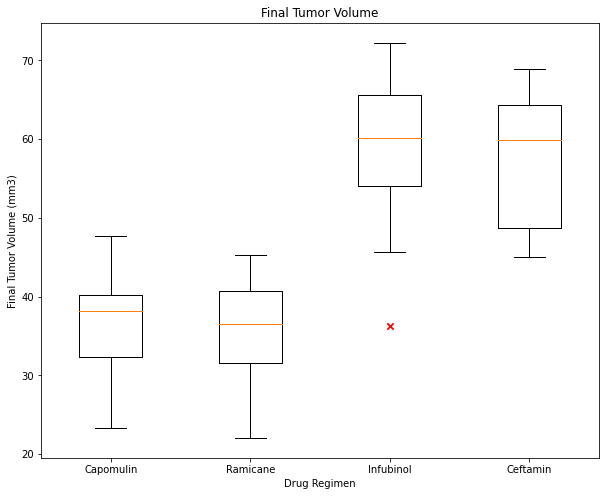

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin_tum, ramicane_tum, infubinol_tum, ceftamin_tum]


plt.figure(figsize = (10,8))
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.boxplot(data, sym='rx')
plt.xticks([1, 2, 3, 4], drugs)



plt.show()

## Line and Scatter Plots

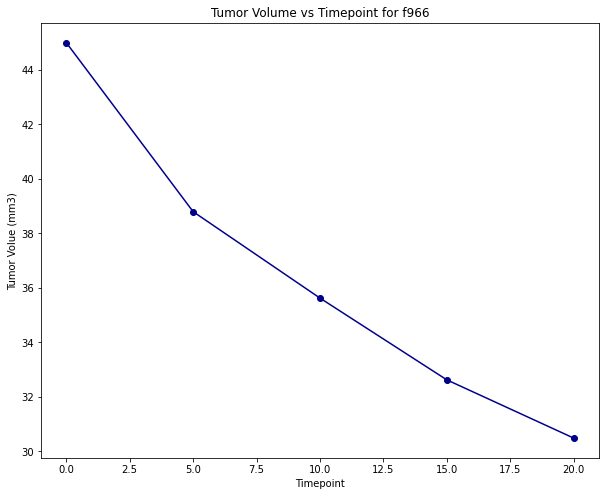

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = "f966"
mouse_df = df[(df["Mouse ID"] == mouse)]
mouse_df
x = mouse_df["Timepoint"]
y = mouse_df["Tumor Volume (mm3)"]
plt.figure(figsize = (10,8))
plt.plot(x, y, marker="o", color="darkblue" )
plt.title(f"Tumor Volume vs Timepoint for {mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volue (mm3)")

plt.show();


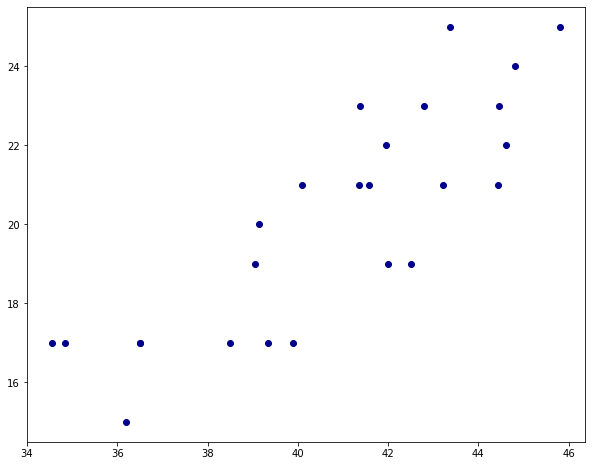

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Determine average tumor volume and average weight for each mouse and assign to variable
avg_vol = df.loc[(df["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean().reset_index()
avg_weight = df.loc[(df["Drug Regimen"] == "Capomulin")].groupby(["Mouse ID"])["Weight (g)"].mean().reset_index()

#Plot
plt.figure(figsize = (10,8))
plt.scatter(avg_vol["Tumor Volume (mm3)"],  avg_weight["Weight (g)"], color="darkblue")
plt.show()



## Correlation and Regression

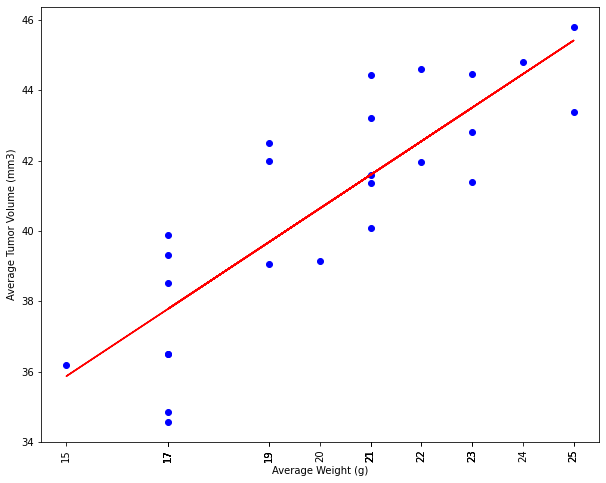

The correlation between average weight of mice and average volume of tumors is 0.84


In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#isolate volume and weight

average_vol = avg_vol["Tumor Volume (mm3)"]
average_weight = avg_weight["Weight (g)"]

#determine the line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(average_weight, average_vol)
regress_values = average_weight * slope + intercept

#plot the line against the scatter plot. 

fit = slope * average_weight + intercept
plt.figure(figsize = (10,8))
plt.scatter(average_weight, average_vol, color = "blue")
plt.plot(average_weight ,fit, color="red")
plt.xticks(average_weight, rotation=90)
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

#determin correlation
correlation = stats.pearsonr(average_weight, average_vol)

print(f"The correlation between average weight of mice and average volume of tumors is {round(correlation[0],2)}")